## sklearn.metrics.precision_score
- sklearn.metrics.precision_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1825)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score "Permalink to this definition")

## sklearn.metrics.recall_score
- sklearn.metrics.recall_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1967)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score "Permalink to this definition")

## sklearn.metrics.f1_score
- sklearn.metrics.f1_score(_y_true_,  _y_pred_,  _*_,  _labels=None_,  _pos_label=1_,  _average='binary'_,  _sample_weight=None_,  _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1011)[](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score "Permalink to this definition")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test,pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score= f1_score(y_test,pred)

    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1_score{3:.4f}'.format(accuracy,precision,recall,f1score))

# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
titanic_df = pd.read_csv('../datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1_score0.7805


/Users/noseohyeong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
pred = lr_clf.predict(X_test)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [4]:
number = 2.3454234234234

print(f'숫자는 { number :.4f}') # f 사용하기

숫자는 2.3454


In [5]:
lr_pred_proba = lr_clf.predict_proba(X_test)

In [6]:
lr_pred_proba

array([[0.46185336, 0.53814664],
       [0.87871962, 0.12128038],
       [0.87720823, 0.12279177],
       [0.88264419, 0.11735581],
       [0.85523282, 0.14476718],
       [0.88225644, 0.11774356],
       [0.88845973, 0.11154027],
       [0.20879117, 0.79120883],
       [0.7828774 , 0.2171226 ],
       [0.36939296, 0.63060704],
       [0.89981856, 0.10018144],
       [0.87502268, 0.12497732],
       [0.87720224, 0.12279776],
       [0.88841376, 0.11158624],
       [0.43660864, 0.56339136],
       [0.85903063, 0.14096937],
       [0.9037353 , 0.0962647 ],
       [0.73348316, 0.26651684],
       [0.72472257, 0.27527743],
       [0.17180819, 0.82819181],
       [0.75365664, 0.24634336],
       [0.61910253, 0.38089747],
       [0.85466964, 0.14533036],
       [0.81479821, 0.18520179],
       [0.88804255, 0.11195745],
       [0.76556278, 0.23443722],
       [0.8596905 , 0.1403095 ],
       [0.92589429, 0.07410571],
       [0.71965908, 0.28034092],
       [0.69545754, 0.30454246],
       [0.

In [7]:
lr_pred_proba[:,1]

array([0.53814664, 0.12128038, 0.12279177, 0.11735581, 0.14476718,
       0.11774356, 0.11154027, 0.79120883, 0.2171226 , 0.63060704,
       0.10018144, 0.12497732, 0.12279776, 0.11158624, 0.56339136,
       0.14096937, 0.0962647 , 0.26651684, 0.27527743, 0.82819181,
       0.24634336, 0.38089747, 0.14533036, 0.18520179, 0.11195745,
       0.23443722, 0.1403095 , 0.07410571, 0.28034092, 0.30454246,
       0.94727201, 0.81733962, 0.12686362, 0.82607485, 0.39952853,
       0.23443722, 0.07236664, 0.61110469, 0.05294346, 0.10388172,
       0.35071948, 0.08330913, 0.8217658 , 0.70781271, 0.63046798,
       0.63048429, 0.91888598, 0.358521  , 0.94889702, 0.11199204,
       0.59278606, 0.11158624, 0.13274518, 0.72537516, 0.30926044,
       0.19685707, 0.22630198, 0.12279281, 0.15414933, 0.43229064,
       0.28004863, 0.10074609, 0.54542573, 0.51398665, 0.44433619,
       0.0945674 , 0.66677941, 0.594114  , 0.951812  , 0.1481218 ,
       0.12886903, 0.16838774, 0.10388396, 0.94800204, 0.19858

In [8]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test,pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # F1 스코어 프린트 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

    
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval(y_test, custom_predict)

thresholds = [0.4, 0.45, 0.50, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


## sklearn.metrics.precision_recall_curve
- sklearn.metrics.precision_recall_curve(_y_true_,  _probas_pred_,  _*_,  _pos_label=None_,  _sample_weight=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_ranking.py#L797)[](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve "Permalink to this definition")

In [9]:
from sklearn.metrics import precision_recall_curve

data = precision_recall_curve(y_test,lr_pred_proba[:,1])

Text(0, 0.5, 'probavility density')

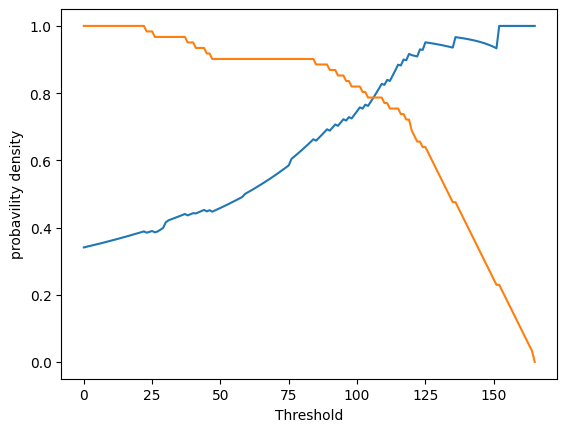

In [10]:
import matplotlib.pyplot as plt

plt.plot(data[0])
plt.plot(data[1])
plt.xlabel('Threshold')
plt.ylabel('probavility density')

In [11]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds =roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
# thresholds[0]운 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arrange는 1부터 시작 
thr_index=np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index',thr_index)
print('샘플 index로 추출한 임곗값', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값 [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


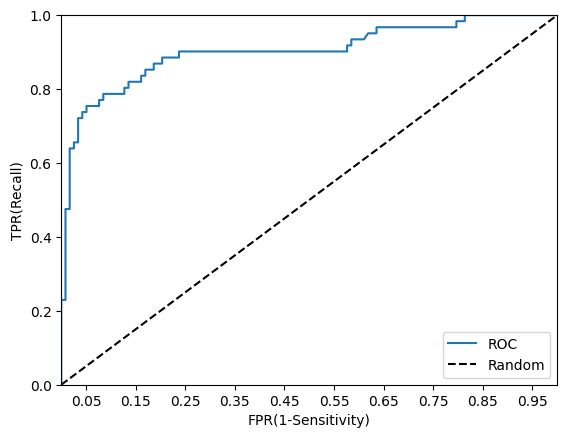

In [12]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds =roc_curve(y_test,pred_proba_c1)

    # roc curve를 plot 곡선을 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label ='Random')

    # FPR x축의 scale을 0,1 단위로 변경 x,y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [13]:
from sklearn.metrics import roc_curve

pred_proba_class1= lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds =roc_curve(y_test,pred_proba_class1)

thr_index =np.arange(1,thresholds.shape[0], 5)
print("샘플 추출을 위한 임곗값 배열의 index:", thr_index)
print("샘플 index로 추출한 임곗값: ",np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


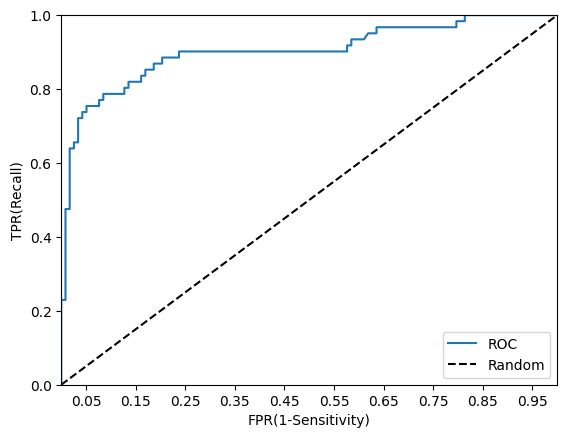

Roc Auc 값:0.9024


In [14]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따를 fpr,tpr,tpr 값을 반환 받음
    fprs,tprs,thresholds =roc_curve(y_test,pred_proba_class1)

    # Roc Curve를 plot곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    # 가운데 대각선 직석ㄴ을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')

    #FPR X축의 Scale을 0,1 단위로 변경,X,Y 축명 설정등
    start,end =plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()


roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print(f'Roc Auc 값:{roc_score:.4f}')

In [15]:
import pandas as pd
df = pd.read_csv('../Datasets/diabetes.csv')

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
def get_clf_eval(y_test,pred , pred_proba):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f} , f1Score:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall, f1score, auc))

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [23]:
print(pred)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [27]:
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=['x1', 'x2'], 
    class_names=['0', '1'],
    filled=True
)

NameError: name 'tree' is not defined

In [25]:
from sklearn.tree import export_graphviz

tree_dot = export_graphviz(
    dt_clf, 
    out_file="tree.dot",
    feature_names=iris.feature_names, 
    class_names=['0', '1', '2'],
    filled=True
)

In [29]:
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 47 kB 3.5 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


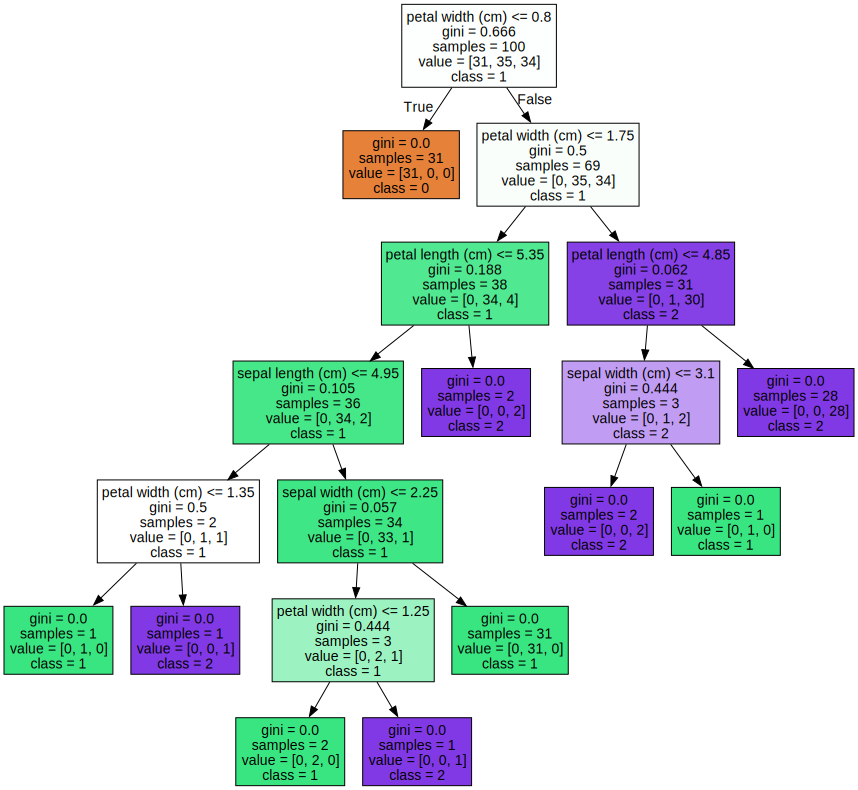

In [30]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)